In [1]:
import pandas as pd

# Part 1. Investment Analysis

## 1.a. How many companies have received at least one round of investment?

In [2]:
df_investment = pd.read_excel('/Users/jieyuan/Desktop/python/final project/2324MBD41_Project_Dataset-v01.xlsx',sheet_name = 'INVESTMENT')

In [3]:
df_investment.head()

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed


In [4]:
# What types of INVESTMENT_STAGES in this excel? and how many for each stage?
df3 = df_investment['INVESTMENT_STAGE'].value_counts()
df3

INVESTMENT_STAGE
—                      1766
Early Stage Venture    1555
Late Stage Venture     1492
Seed                    954
Private Equity          170
Name: count, dtype: int64

In [5]:
# for investment stage is "-", it doesn't have investment
filt_df = df_investment[df_investment['INVESTMENT_STAGE'] != '—']           # do not contain INVESTMENT_STAGE = "—"
filt_df

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed
10,Brex,Series D,"$425,000,000","Apr 26, 2021",Late Stage Venture
...,...,...,...,...,...
5922,Amperity,Series C,"$50,000,000","Jul 15, 2019",Late Stage Venture
5923,Medium,Series A,"$25,000,000","Jan 28, 2014",Early Stage Venture
5924,Medium,Series B,"$57,000,000","Sep 29, 2015",Early Stage Venture
5925,Medium,Series C,"$50,000,000","Apr 21, 2016",Late Stage Venture


In [6]:
# Count the number of companies with at least one round of investment
num_companies_with_investment = filt_df['COMPANY_NAME'].nunique()
num_companies_with_investment

828

In [7]:
print(f"{num_companies_with_investment} companies received at least one round of investment")

828 companies received at least one round of investment


## 1.b. Total Investment Received by Companies in each Category (Top 10)

Companies receive different currency. In order to solve this question, we first need to unify currencies. 

Make them all into $

In [8]:
# check what kind of currencies they have in this dataset, and find conversion rate from internet.
# Extracting non-numeric leading characters (currency symbols)
df_investment['CURRENCY_SYMBOL'] = df_investment['MONEY_RAISED'].str.extract(r'([^0-9,]+)')

# Identifying unique currency symbols
unique_currencies = df_investment['CURRENCY_SYMBOL'].unique()

print(unique_currencies)

['$' '—' '€' '¥' '₹' '£' 'CA$' 'A$' 'CN¥' 'R$' 'ZAR' 'SGD' '₩' 'CHF' 'MYR'
 'SEK' 'RUB']


In [9]:
exchange_rates = {'$': 1, '-': 1, '€':1.2, '¥':0.008, '₹':0.014, '£': 1.4, 'CA$': 0.8, 'A$':0.7, 'CN¥':0.15, 
                  'R$':0.2, 'ZAR':0.06, 'SGD':0.7, '₩':0.0008, 'CHF':1, 'MYR':0.24,'SEK':0.11, 'RUB':0.014}

In [10]:
import re
# define a function to convert currencies
def convert_to_usd(amount):
    # Extract currency symbol and numeric part
    match = re.match(r'([€$£CA$₹]+)([\d,]+)', amount)
    if match:
        currency_symbol, numeric_part = match.groups()
        numeric_value = float(numeric_part.replace(',', ''))
        return numeric_value * exchange_rates.get(currency_symbol, 1)
    return 0

In [11]:
# Applying the conversion to each value in 'MONEY_RAISED'
df_investment['MONEY_RAISED_USD'] = df_investment['MONEY_RAISED'].apply(convert_to_usd)

In [12]:
df_company = pd.read_excel('/Users/jieyuan/Desktop/python/final project/2324MBD41_Project_Dataset-v01.xlsx',sheet_name = 'COMPANY')

In [13]:
df_company.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10


Split the Categories: For companies listed under multiple categories, split these into separate rows.

Merge with Investment Data: Merge this expanded company data with the investment data.

Calculate Total Investments by Category: Sum up the investments for each category.

In [14]:
# Splitting the CATEGORY column
df_company_expanded = df_company.drop('CATEGORY', axis=1).join(
    df_company['CATEGORY'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('CATEGORY')
)

In [15]:
# Merging the expanded company data with investment data
df_merged = pd.merge(df_investment, df_company_expanded, on='COMPANY_NAME', how='inner')

In [16]:
# Grouping by 'CATEGORY' and summing the investments
total_investment_by_category = df_merged.groupby('CATEGORY')['MONEY_RAISED_USD'].sum()

In [22]:
total_investment_by_category

CATEGORY
 3D Technology            6.130000e+08
 Ad Retargeting           6.800000e+06
 Advertising              1.300000e+08
 Advertising Platforms    5.291000e+08
 Aerospace                6.857200e+08
                              ...     
Social Media              2.250000e+07
Software                  1.700000e+07
Subscription Service      4.050000e+06
eSports                   3.193482e+07
—                         1.276400e+09
Name: MONEY_RAISED_USD, Length: 619, dtype: float64

There are so many categories, I want to see top 10 categories (which rec"eived the most investment)

In [18]:
top_10_categories = total_investment_by_category.sort_values(ascending=False).head(10)

# Displaying the top 10 categories
print(top_10_categories)

CATEGORY
 Internet                  1.534624e+11
 Software                  1.216594e+11
 Transportation            8.025275e+10
 Financial Services        7.578684e+10
 FinTech                   6.952138e+10
 E-Commerce                6.204416e+10
 Information Technology    5.877912e+10
 Payments                  5.799009e+10
Apps                       5.560761e+10
 Telecommunications        5.421890e+10
Name: MONEY_RAISED_USD, dtype: float64


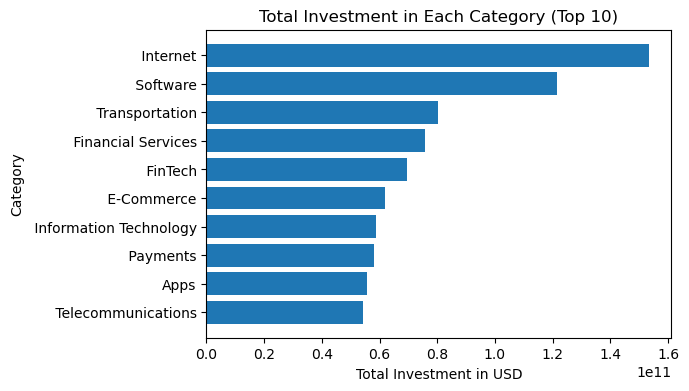

In [19]:
import matplotlib.pyplot as plt

# Convert the Series to a DataFrame for plotting
investment_df = top_10_categories.reset_index()
investment_df.columns = ['Category', 'Total Investment']

# Sort the data for better visualization (optional: you can show top N categories)
investment_df_sorted = investment_df.sort_values(by='Total Investment', ascending=False)

# Plotting
plt.figure(figsize=(6, 4))  
plt.barh(investment_df_sorted['Category'], investment_df_sorted['Total Investment'])
plt.xlabel('Total Investment in USD')
plt.ylabel('Category')
plt.title('Total Investment in Each Category (Top 10)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

From this graph, we can see internet is the category which received the most investment. In the top 10 categories, (Internet, Software, Fintech, E-Commerce, Information Technology, Apps) six of them are related to IT (or internet). 



Therefore, if you are looking for a job (or start up a company), internet-related industry is a good choice. (regarding the invested money)

## 1.c. Trends in Investment Amounts Over Time

See the trend of amount of money invested and recorded.

In [23]:
# Convert dates to datetime objects
df_investment['ANNOUNCED_DATE'] = pd.to_datetime(df_investment['ANNOUNCED_DATE'])

# Group by year
trends_over_time = df_investment.groupby(df_investment['ANNOUNCED_DATE'].dt.year)['MONEY_RAISED_USD'].sum()

In [24]:
trends_over_time

ANNOUNCED_DATE
1968    2.510000e+06
1977    8.000000e+04
1978    1.500000e+05
1982    0.000000e+00
1983    0.000000e+00
1987    7.500000e+06
1996    2.000000e+05
1997    2.565780e+05
1998    2.826014e+07
1999    6.680680e+08
2000    3.703000e+08
2001    5.621400e+09
2002    1.240234e+08
2003    6.973239e+08
2004    4.080000e+08
2005    2.071000e+08
2006    6.542768e+08
2007    1.102715e+09
2008    7.938702e+08
2009    5.724924e+09
2010    1.057272e+09
2011    1.257223e+10
2012    7.628824e+09
2013    1.237635e+10
2014    6.005276e+10
2015    3.590675e+10
2016    3.842973e+10
2017    6.945909e+10
2018    9.849585e+10
2019    7.128835e+10
2020    1.494240e+11
2021    6.027073e+10
Name: MONEY_RAISED_USD, dtype: float64

### Now visualize the trend

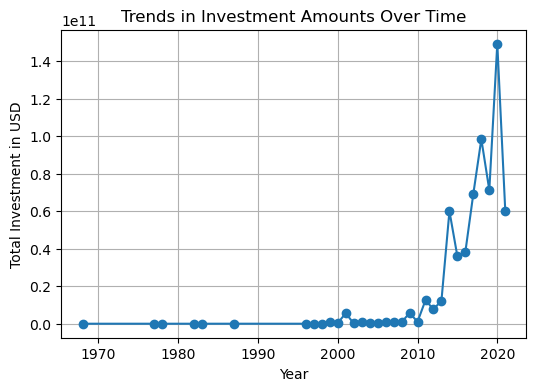

In [25]:
import matplotlib.pyplot as plt

# Convert the Series to a DataFrame for easier plotting
trends_df = trends_over_time.reset_index()
trends_df.columns = ['Year', 'Total Investment']

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(trends_df['Year'], trends_df['Total Investment'], marker='o')
plt.title('Trends in Investment Amounts Over Time')
plt.xlabel('Year')
plt.ylabel('Total Investment in USD')
plt.grid(True)
plt.show()

From this graph, we see that the money invested in the market remained stable (almost nothing) until 2010. 

The invested money increased and reached to peak (more than 1.4 lell) in 2020.

## 1.d. On average, how much money each company has received at Series A round?

In [26]:
# In question 1.a, we have transfered all currencies to dollar signs. So now we can use that data. (use convert_to_usd function)
df_merged.head()

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,CURRENCY_SYMBOL,MONEY_RAISED_USD,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,CATEGORY
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—,$,250000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,Finance
1,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—,$,250000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,Financial Services
2,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—,$,250000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,Internet
3,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—,$,250000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,SaaS
4,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,$,50000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,Finance


In [27]:
df_SA = df_merged[df_merged['FUNDING_TYPE'] == 'Series A']
df_SA.head()

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,CURRENCY_SYMBOL,MONEY_RAISED_USD,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,CATEGORY
4,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,$,50000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,Finance
5,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,$,50000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,Financial Services
6,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,$,50000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,Internet
7,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,$,50000000.0,"Los Angeles, California, United States","Aug 1, 2019",—,—,$1M to $10M,11-50,SaaS
61,Brex,Series A,"$7,000,000","Apr 1, 2017",Early Stage Venture,$,7000000.0,"San Francisco, California, United States",Mar 2017,—,—,$10M to $50M,251-500,Accounting


In [28]:
# calculate average value (exclude none value)
average_value = df_SA['MONEY_RAISED_USD'].dropna().mean()

In [29]:
print(f"Average value companies received in series A is ${average_value: .2f}")

Average value companies received in series A is $ 16234090.00


Therefore, on average, 16234090 dollars has raised at Series A round

# Part 2. Company Status

## 2.a. What are the distributions of the current status of these companies?

In [30]:
df_company = pd.read_excel('/Users/jieyuan/Desktop/python/final project/2324MBD41_Project_Dataset-v01.xlsx',sheet_name = 'COMPANY')

In [31]:
df_company.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10


For this question, the columns "FOUNDED_ON",	"EXITED_ON,	and "CLOSED_ON" can be used to describe the current status of these companies.

Operational Companies:

If a company has a "FOUNDED_ON" date and does not have a "CLOSED_ON" or "EXITED_ON" date.

In [32]:
# replace all the "—" into NAN
df_company['CLOSED_ON'] = df_company['CLOSED_ON'].replace('—', pd.NA)
df_company['EXITED_ON'] = df_company['EXITED_ON'].replace('—', pd.NA)
df_company.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",<NA>,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,<NA>,<NA>,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,<NA>,<NA>,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",<NA>,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,<NA>,<NA>,$1M to $10M,1-10


In [33]:
# both 'CLOSED_ON' and 'EXITED_ON' is NaN, and 'FOUNDED_ON' is not NaN
operation_companies = df_company[(pd.isna(df_company['CLOSED_ON']) & pd.isna(df_company['EXITED_ON'])) & ~pd.isna(df_company['FOUNDED_ON'])]
operation_companies

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,NaN,NaN,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,NaN,NaN,$1M to $10M,51-100
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,NaN,NaN,$1M to $10M,1-10
7,OurCrowd,"Angel Investment, Crowdfunding, FinTech, Fundi...","Jerusalem, Yerushalayim, Israel","Feb 1, 2013",NaN,NaN,$50M to $100M,101-250
9,Crowdcube,"Business Development, Finance, Financial Servi...","Exeter, Devon, United Kingdom","Aug 1, 2010",NaN,NaN,$1M to $10M,51-100
...,...,...,...,...,...,...,...,...
994,Privitar,"Big Data, Cyber Security, Enterprise Software,...","London, England, United Kingdom","Nov 15, 2014",NaN,NaN,$1M to $10M,101-250
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",NaN,NaN,$1M to $10M,11-50
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",NaN,NaN,$50M to $100M,251-500
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,NaN,NaN,Less than $1M,1-10


In [34]:
operation_companies['COMPANY_NAME']

1      Ant Group
2         Squire
4          maude
7       OurCrowd
9      Crowdcube
         ...    
994     Privitar
995        Valiu
996      Airship
997      Jupiter
999      Bitmain
Name: COMPANY_NAME, Length: 674, dtype: object

Closed Companies:

If a company has a "CLOSED_ON" date, it is considered closed.

In [35]:
closed_companies = df_company[df_company['CLOSED_ON'].notna()]
closed_companies

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
184,Omni,"Apps, Marketplace, Mobile","San Francisco, California, United States","Aug 1, 2014",<NA>,"Jan 6, 2020",Less than $1M,51-100
507,Nokia,"Electronics, Enterprise Software, Infrastructu...","Espoo, Southern Finland, Finland","May 12, 1865","Oct 8, 2004","Dec 28, 2020",$1B to $10B,10001+
624,YourStory,"Internet, News, Public Relations, Publishing","Bangalore, Karnataka, India","Oct 1, 2008",<NA>,"Apr 13, 2020",Less than $1M,11-50
835,Vault,"Financial Services, Lending, Personal Finance","Austin, Texas, United States",2013,<NA>,2014,$1M to $10M,11-50
929,Zume Pizza,"Consumer, Food and Beverage, Food Delivery","Mountain View, California, United States","Sep 8, 2015",<NA>,Jan 2020,$50M to $100M,101-250


In [36]:
closed_companies['COMPANY_NAME']

184          Omni
507         Nokia
624     YourStory
835         Vault
929    Zume Pizza
Name: COMPANY_NAME, dtype: object


Acquired Companies:

If a company has an "EXITED_ON" date and does not have a "CLOSED_ON" date, it is considered acquired.

In [37]:
acquired_companies = df_company[(df_company['EXITED_ON'].notna()) & pd.isna(df_company['CLOSED_ON'])]
acquired_companies

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",NaN,$1B to $10B,1001-5000
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",NaN,$10B+,10001+
5,Facebook,"Mobile Apps, Social, Social Media, Social Netw...","Menlo Park, California, United States","Feb 4, 2004","May 18, 2012",NaN,$10B+,10001+
6,Apple,"Consumer Electronics, Electronics, Hardware, M...","Cupertino, California, United States","Apr 1, 1976","Dec 12, 1980",NaN,$10B+,10001+
8,Netflix,"Digital Entertainment, Media and Entertainment...","Los Gatos, California, United States","Jan 1, 1997","May 23, 2002",NaN,$10B+,1001-5000
...,...,...,...,...,...,...,...,...
988,Withings,"Apps, Consumer Electronics, Health Care, Softw...","Issy-les-moulineaux, Ile-de-France, France","Jun 1, 2008","Apr 26, 2016",NaN,$50M to $100M,101-250
989,Avaloq,"Banking, Financial Services, FinTech, Software","Zürich, Zurich, Switzerland",1991,"Oct 5, 2020",NaN,$500M to $1B,1001-5000
991,comScore,"Analytics, Consumer, SaaS, Social Media Market...","Reston, Virginia, United States","Aug 1, 1999","Jun 28, 2007",NaN,$50M to $100M,1001-5000
992,Cornershop,"E-Commerce, Internet, Mobile","Las Condes, Region Metropolitana, Chile","Mar 10, 2015","Oct 11, 2019",NaN,$50M to $100M,101-250


In [38]:
acquired_companies['COMPANY_NAME']

0              Twitter
3               Xiaomi
5             Facebook
6                Apple
8              Netflix
            ...       
988           Withings
989             Avaloq
991           comScore
992         Cornershop
998    Bank of America
Name: COMPANY_NAME, Length: 321, dtype: object

In [39]:
print(len(operation_companies), ' companies are Operational Companies.')
print(len(closed_companies),' companies are Closed Companies.')
print(len(acquired_companies), ' companies are Acquired Companies.')

674  companies are Operational Companies.
5  companies are Closed Companies.
321  companies are Acquired Companies.


### Data Visualization

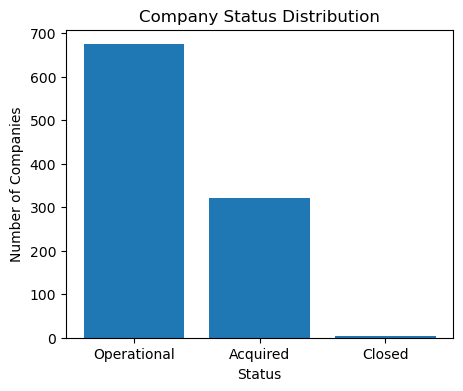

In [40]:
company_status_counts = {"Operational": len(operation_companies), 
                         "Acquired": len(acquired_companies), 
                         "Closed": len(closed_companies)}
statuses = list(company_status_counts.keys())
counts = list(company_status_counts.values())

# Creating a bar chart
plt.figure(figsize=(5, 4))
plt.bar(statuses, counts)

plt.title("Company Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Companies")

# Showing the plot
plt.show()

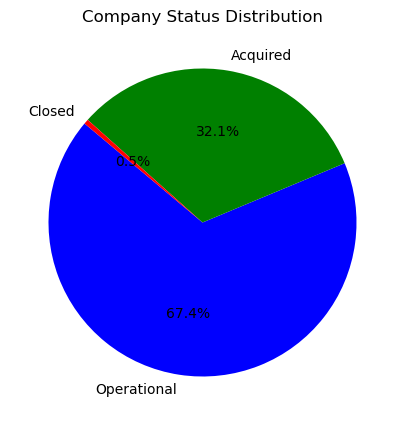

In [41]:
# Creating a pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=statuses, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red'])
plt.title("Company Status Distribution")
plt.show()

### There are three statuses for these companies:
* **674 companies are Operational Companies**

(If a company has a "FOUNDED_ON" date and does not have a "CLOSED_ON" or "EXITED_ON" date)


* **5 companies are Closed Companies**

(If a company has a "CLOSED_ON" date, it is considered closed)


* **321 companies are Acquired Companies**

(A company has an "EXITED_ON" date and does not have a "CLOSED_ON" date, it is considered acquired)


## 2.b. Average years Taken for Companies to Exit (only look at year)

use the year to exit - the year to found

Before processing data, let's get only year.

In [42]:
df_company = pd.read_excel('/Users/jieyuan/Desktop/python/final project/2324MBD41_Project_Dataset-v01.xlsx',sheet_name = 'COMPANY')

In [43]:
def extract_year(date_str):
    # Regular expression to match a four-digit number (year)
    match = re.search(r'\b\d{4}\b', date_str)
    return int(match.group()) if match else None

In [44]:
# Convert the 'FOUNDED_ON' column to string
df_company['FOUNDED_ON'] = df_company['FOUNDED_ON'].astype(str)

In [45]:
# Apply the function to columns to extract the year
df_company['FOUNDED_YEAR'] = df_company['FOUNDED_ON'].apply(extract_year)
df_company['EXITED_YEAR'] = df_company['EXITED_ON'].apply(extract_year)

In [46]:
df_company['FOUNDED_YEAR']

0      2006
1      2014
2      2016
3      2010
4      2018
       ... 
995    2018
996    2009
997    2019
998    1998
999    2013
Name: FOUNDED_YEAR, Length: 1000, dtype: int64

In [47]:
df_company['EXITED_YEAR']

0      2013.0
1         NaN
2         NaN
3      2018.0
4         NaN
        ...  
995       NaN
996       NaN
997       NaN
998    1978.0
999       NaN
Name: EXITED_YEAR, Length: 1000, dtype: float64

In [48]:
# Some companies not exited. I only want to calculate the years for exit companies.
exit_comp = df_company.dropna(subset=['EXITED_YEAR'])

In [49]:
# Calculate differences of founded and exited (only for exited companies)
df_company['TIME_TO_EXIT_YEARS'] = exit_comp['EXITED_YEAR'] - exit_comp['FOUNDED_YEAR']

In [50]:
# Calculating the average time to exit in years (round to 2 decimal)
avg_exit_years = df_company['TIME_TO_EXIT_YEARS'].mean()

print(f"Average time to exit is{avg_exit_years: .2f} years")

Average time to exit is 16.89 years


# Part 3. Acquisition Insights:

## 3.a. Which company has the largest number of acquisitions?

In [51]:
df_ACQUISITION = pd.read_excel('/Users/jieyuan/Desktop/python/final project/2324MBD41_Project_Dataset-v01.xlsx',sheet_name = 'ACQUISITION')

In [52]:
df_ACQUISITION.head()

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE
0,IBM,Turbonomic,"Apr 29, 2021","$2,000,000,000",Acquisition
1,IBM,myInvenio,"Apr 15, 2021",—,Acquisition
2,IBM,Taos Mountain,"Jan 14, 2021",—,Acquisition
3,IBM,Cloudant,"Feb 24, 2014",—,Acquisition
4,IBM,TruQua,"Nov 16, 2020",—,Acquisition


In [53]:
# Exclude the NaN values in ACQUISITION_TYPE clumne
df_ACQUISITION2 = df_ACQUISITION.dropna(subset=['ACQUISITION_TYPE'])

In [54]:
# Counting the number of acquisitions for each company
acq_counts = df_ACQUISITION2['COMPANY_NAME'].value_counts()

In [55]:
acq_counts

COMPANY_NAME
Microsoft        235
Cisco            233
Google           230
Accenture        215
EQT              175
                ... 
Manbang Group      1
LEAD School        1
Ro                 1
Draper Esprit      1
Auth0              1
Name: count, Length: 497, dtype: int64

### Data Visualization
Top 10 companies who have the most acquisitions

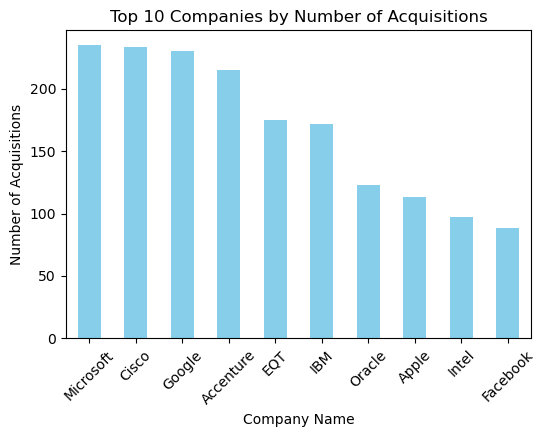

In [56]:
top_acq = acq_counts.head(10)

# Creating a bar chart
plt.figure(figsize=(6, 4))
top_acq.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies by Number of Acquisitions')
plt.xlabel('Company Name')
plt.ylabel('Number of Acquisitions')
plt.xticks(rotation=45)
plt.show()

The company has the most acquisitions:

In [57]:
# Identifying the company with the highest number of acquisitions
comp_max_acq = acq_counts.idxmax()
num_acq = acq_counts.max()

In [58]:
print(f"Company with the most acquisitions: {comp_max_acq}")
print(f"Number of acquisitions: {num_acq}")

Company with the most acquisitions: Microsoft
Number of acquisitions: 235


## 3.b. Which company spent the most money in company acquisition?

First, we need to find out how many different currencies they have for company acquisition

In [59]:
currencies = df_ACQUISITION2['PRICE'].str.extract('([^\d.,]+)')[0].unique()
print(currencies)

['$' '—' '€' '£' 'A$' 'CA$' 'DKK' 'CHF' 'RUB' '₹' 'CN¥' 'R$' 'SEK']


In [60]:
exchange_rates = {'$': 1, '-': 1, '€':1.2, '£': 1.4, 'A$':0.7, 'RUB':0.014, 'CA$': 0.8, '₹':0.014, 'R$':0.2,
                   'CHF': 0.93, 'CN¥':0.15, 'SEK':0.11}

In [61]:
# define a finction to convert currencies
# we did this in question 1.a. we put here again. 

def convert_to_usd(amount):
    # Extract currency symbol and numeric part
    match = re.match(r'([€$£CA$₹]+)([\d,]+)', amount)
    if match:
        currency_symbol, numeric_part = match.groups()
        numeric_value = float(numeric_part.replace(',', ''))
        return numeric_value * exchange_rates.get(currency_symbol, 1)
    return 0

In [62]:
# Applying the conversion to each value in 'PRICE'
df_ACQUISITION2['PRICE_USD'] = df_ACQUISITION2['PRICE'].apply(convert_to_usd)

In [63]:
df_ACQUISITION2['PRICE_USD']

0       2.000000e+09
1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
5284    0.000000e+00
5285    0.000000e+00
5286    0.000000e+00
5287    0.000000e+00
5288    0.000000e+00
Name: PRICE_USD, Length: 5289, dtype: float64

In [64]:
# Sum Prices for Each Company: Aggregate the acquisition prices by company.
sum_spent = df_ACQUISITION2.groupby('COMPANY_NAME')['PRICE_USD'].sum()

In [65]:
print(sum_spent)

COMPANY_NAME
1mg                            0.0
23andMe                        0.0
ATAI Life Sciences             0.0
AbCellera Biologics     90000000.0
Accenture              726500000.0
                          ...     
iFood                          0.0
iZettle                        0.0
ipsy                   500000000.0
nCino                          0.0
project44                      0.0
Name: PRICE_USD, Length: 497, dtype: float64


Now we get their money spent by each company. Let's get top 10 companies

In [66]:
sorted_spend = sum_spent.sort_values(ascending=False)

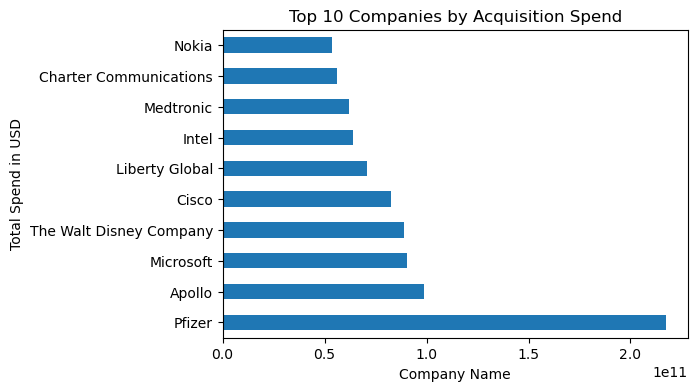

In [67]:
# Extract the top 10 companies
top_10 = sorted_spend.head(10)

# Creating a bar chart for the top 10 spenders
plt.figure(figsize=(6, 4))
top_10.plot(kind='barh')
plt.title('Top 10 Companies by Acquisition Spend')
plt.xlabel('Company Name')
plt.ylabel('Total Spend in USD')
plt.show()

In [68]:
max_spd = sum_spent.idxmax()
num_spd = sum_spent.max()

In [69]:
print(f"{max_spd} spent the most to acquire companies, it spent ${num_spd}")

Pfizer spent the most to acquire companies, it spent $217190000000.0


## 3.c. Which acquiree is the most expensive?

top 10 most expensive companies

In [70]:
sorted_price = df_ACQUISITION2.sort_values(by= 'PRICE_USD', ascending=False).head(10)
print(sorted_price[['ACQUIREE_NAME', 'PRICE_USD']])

           ACQUIREE_NAME     PRICE_USD
1450      Warner-Lambert  9.000000e+10
3701    21st Century Fox  7.130000e+10
1464  Wyeth Nutritionals  6.800000e+10
4855            Spectrum  5.600000e+10
4056            Covidien  4.290000e+10
4302        Arm Holdings  4.000000e+10
2957        Arm Holdings  3.402000e+10
50               Red Hat  3.400000e+10
3287        Virgin Media  2.330000e+10
3283        Virgin Media  2.330000e+10


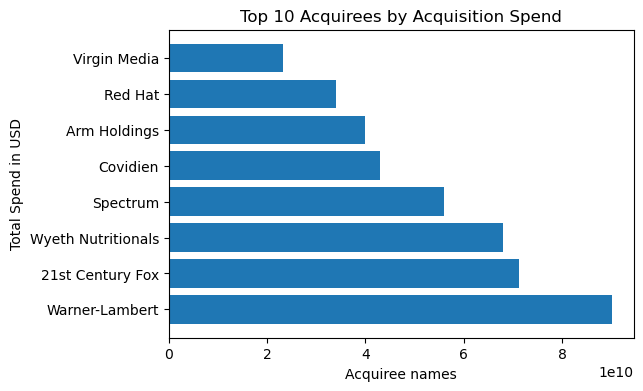

In [71]:
# Creating a bar chart for the top 10 expensive companies
plt.figure(figsize=(6, 4))
plt.barh(sorted_price['ACQUIREE_NAME'], sorted_price['PRICE_USD'])
plt.title('Top 10 Acquirees by Acquisition Spend')
plt.xlabel('Acquiree names')
plt.ylabel('Total Spend in USD')
plt.show()

Now get the most expensive acquiree

In [72]:
exp_acq = df_ACQUISITION2.loc[df_ACQUISITION2['PRICE_USD'].idxmax()]
exp_acq

COMPANY_NAME                 Pfizer
ACQUIREE_NAME        Warner-Lambert
ANNOUNCED_DATE          Feb 7, 2000
PRICE               $90,000,000,000
ACQUISITION_TYPE        Acquisition
PRICE_USD             90000000000.0
Name: 1450, dtype: object

In [73]:
print(f"The most expensive acquiree is {exp_acq['ACQUIREE_NAME']}, for ${exp_acq['PRICE_USD']}")

The most expensive acquiree is Warner-Lambert, for $90000000000.0


# Part 4 Employee analysis

## 4.1. Which of these companies have CEOs graduated from a QS top 20 school?

In [74]:
df = pd.read_excel('/Users/jieyuan/Desktop/python/final project/2324MBD41_Project_Dataset-v01.xlsx',sheet_name = 'EMPLOYEE')

In [75]:
df.head()

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
0,aac4a9fe0edc50a77072eae64578a892,CEO,Twitter,NaN
1,f9c87bcba2ffe2237e039b2e2c86b16f,Co-Founder,Twitter,Northeastern University University of Massach...
2,36830ffebad9a630da8a7a03a45f2730,Team Member,Twitter,NaN
3,84a91ad0f9b4149759f47fdc949fed42,General Counsel,Twitter,Cornell University New York University School...
4,7881769fc62f54c36a687bda02b66198,"VP, Trust & Safety",Twitter,NaN


In [76]:
# get only Job tile is CEO or Chief Exacutive Officer
s = df['JOB_TITLES']
dfx = df[s.str.contains('CEO') | s.str.contains('Chief Exacutive Officer')]
dfx

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
0,aac4a9fe0edc50a77072eae64578a892,CEO,Twitter,NaN
107,1695d67dedf7d6913b77025f96b43957,CEO,Google,Indian Institute of Technology Kharagpur Stan...
491,f7034d0eed81c81a2ca1b9ef1c2f471b,"CEO, Google Cloud",Google,Princeton University Stanford Graduate School...
1704,a31eaa3832e6bba75a416e7acb949678,Co-Founder & CEO,Airbnb,Rhode Island School of Design
1844,ebcbd9c696d452830124969a587792a8,CEO and Founder,Twitch,NaN
...,...,...,...,...
20668,d4281b44c8bbc13f8bbb957a60a44a73,CEO,Animoca Brands,NaN
20686,dbbb2f8af8709bef5d8c5e367cf11752,CEO,HMD,NaN
20697,72c32150cb3f9b6e806fa530ed610175,Chairman and CEO,Iberdrola,NaN
20699,aae97cfe2ea38ca0609a341e984b6b57,CEO,JD Logistics,NaN


In [77]:
# There are NAN in attended_schools, we exclude them
schools = dfx[dfx['ATTENDED_SCHOOLS'].notna()]
schools

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
107,1695d67dedf7d6913b77025f96b43957,CEO,Google,Indian Institute of Technology Kharagpur Stan...
491,f7034d0eed81c81a2ca1b9ef1c2f471b,"CEO, Google Cloud",Google,Princeton University Stanford Graduate School...
1704,a31eaa3832e6bba75a416e7acb949678,Co-Founder & CEO,Airbnb,Rhode Island School of Design
1879,5e78e4b5ec3d9b0690742153727f11f3,CEO,Apple,Duke University
2056,62fb041d6b3473680badf57cc54ad6fd,President & CEO,Berkshire Hathaway,Columbia University University of Nebraska-Li...
...,...,...,...,...
20451,f4230b5b27433167ab5d0261070d0a13,CEO,Plug Power,Temple University
20556,9ba30a8d59414a15de416bf4f9ef4bae,Co-Founder & CEO,Signals Analytics,IDC Herzliya
20559,981ab6d5e43a0e0b873a26fae6144dc0,CEO,QueQ,King Mongkut's Institute of Technology Ladkra...
20560,8a04925d8044276c945aac347c708752,CEO,Exclaimer,University of Greenwich


In [78]:
QStop20 = ["Massachusetts Institute of Technology - MIT", "University of Cambridge", "University of Oxford", 
           "Harvard University", "Stanford University", "Imperial College London", "ETH Zurich", 
           "National University of Singapore - NUS", "UCL", "University of California", "Berkeley - UCB",
          "University of Chicago", "University of Pennsylvania", "Cornell University", "The University of Melbourne",
          "California Institute of Technology - Caltech", "Yale University", "Peking University", "Princeton University",
          "The University of New South Wales - UNSW Sydney", "The University of Sydney"]

In [79]:
# get CEOs from QStop20 and their company names

pattern = '|'.join(QStop20)

# rows containing any of the specified parts
mask = dfx['ATTENDED_SCHOOLS'].str.contains(pattern, case=False, na=False)
QS20CEO = dfx[mask]
QS20CEO

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
107,1695d67dedf7d6913b77025f96b43957,CEO,Google,Indian Institute of Technology Kharagpur Stan...
491,f7034d0eed81c81a2ca1b9ef1c2f471b,"CEO, Google Cloud",Google,Princeton University Stanford Graduate School...
2056,62fb041d6b3473680badf57cc54ad6fd,President & CEO,Berkshire Hathaway,Columbia University University of Nebraska-Li...
2200,d842e52dd6f91b59518baee8e983d347,Co-Founder & CEO,OpenAI,Stanford University
2352,28cbfc72a27fc69e11b6d1abf75c2b44,Co-Founder and CEO,Slack,University of Cambridge University of Victoria
...,...,...,...,...
20060,d41b822acb5c0c5c3bafb9312b63b359,CEO,Venafi,University of California Davis
20083,1c705ea1662bb333462a204913cbcf0d,Co-founder & CEO,Jopwell,Yale University
20191,92ae809be741a2c9918eea3426448c4e,CEO & GM at MuleSoft,MuleSoft,Dartmouth College University of Pennsylvania
20273,c16928fab0ec35cd0daf54378a1366c3,Co-Founder and CEO,eero,Stanford University


In [80]:
# culculate the persentage of ccompany CEOs from QS ranking 20 Universities:
print("There are ", f"{QS20CEO['COMPANY_NAME'].nunique() / schools['COMPANY_NAME'].nunique() * 100:.2f}", "%", "of company CEOs graduate from QS ranking top 20 Universities.")
# some company names appear more than once, we only need to culculate once
# exclude those schools not recorded
# round to 2 decimals

There are  32.01 % of company CEOs graduate from QS ranking top 20 Universities.


In [81]:
# list the names of companies have CEOs graduated from a QS ranking top 20 schools
names = QS20CEO['COMPANY_NAME'].unique().tolist()

In [82]:
print("Companies have CEOs graduated from a QS ranking top 20 schools: ", ', '.join(names))

Companies have CEOs graduated from a QS ranking top 20 schools:  Google, Berkshire Hathaway, OpenAI, Slack, Stripe, Snapdeal, Voyager Space Holdings, Amazon Web Services, Facebook, Robinhood, Netflix, QuantumScape, Nubank, CARS24, Stitch Fix, DoorDash, Roblox, Sea, Acorns, NVIDIA, Pave, Eat Just, Inc., 1mg, Microsoft, Luminar, Tesla, Ripple, Grubhub, Warby Parker, 23andMe, SoFi, Snap, Bolt, Delivery Hero, Cloudflare, Incredible Health, PubMatic, Lalamove, Silver Lake, Expanse, Wayfair, Cisco, Brex, Upwork, Workday, OurCrowd, Handshake, Indiegogo, Apollo, Butterfly Network, Teladoc, Vox Media, MicroStrategy, Babylon Health, Primer, Metromile, Honor, CodeSignal, Mulberry Platform, Landit, Lattice, Morgan Stanley, Pfizer, AppsFlyer, GoCardless, Investcorp, OutSystems, MercadoLibre, MediaMath, Lark, OneWeb, Hims, SmartAsset, Comcast, Menlo Security, Bitmain, Solv, Foursquare, Contentful, CareAcademy, Tanium, Pico, Inscripta, Porch, True Balance, Parallel Domain, OZY Media, SecurityScorecar